# Understanding Growth Rate, Velocity, and Accelleration

In finance and econometrics – "Growth rates refer to the percentage change of a specific variable within a specific time period." - https://www.investopedia.com/terms/g/growthrates.asp

Finance Price - 0.01%/d bullish - For every day, there will be a 0.01% change in growth in a higher bullish direction.


In physics - "Velocity is the speed in combination with the direction of motion of an object. " - https://en.wikipedia.org/wiki/Velocity

Physics - 60km/h to the north - 
For every hour, there will be a displacement of 60km in distance in a north direction.

## 1] Growth Rate

,value,gr,equilibrium
0,1.0,NaN,0
1,2.0,1.0,0
2,4.0,1.0,0
3,2.0,-0.5,0
4,1.0,-0.5,0
5,0.5,-0.5,0
6,-0.5,-2.0,0
7,-1.0,1.0,0
8,-2.0,1.0,0
9,-4.0,1.0,0


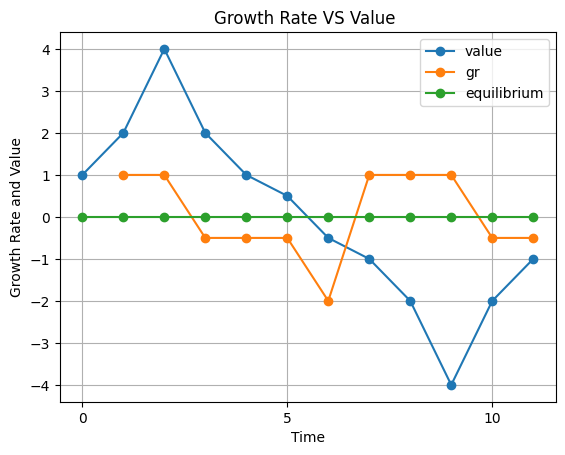

In [5]:
# Sample Data
SAMPLE = {
    'value': [
        1, 2, 4, 2, 1, 0.5, -0.5, -1, -2, -4, -2, -1
    ]
}
import pandas as pd
import math
df = pd.DataFrame(SAMPLE)
df['curr_value'] = df['value'].astype(float)
df['prev_value'] = df['curr_value'].shift(1)
df['CMinusP'] = df['curr_value'] - df['prev_value']
df['gr'] = df['CMinusP'] / df['prev_value']
df['pandas_gr'] = df['value'].pct_change()
df['equilibrium'] = 0
df[[
    'value', 'gr', 'equilibrium'
]].plot(
    marker='o', grid=True,
    xticks=[0, 5, 10],
    title=(
        'Growth Rate VS Value '
    ),
    ylabel='Growth Rate and Value',
    xlabel='Time'
)
df[['value', 'gr', 'equilibrium']]

,value,pandas_gr,equilibrium
0,1.0,NaN,0
1,2.0,1.0,0
2,4.0,1.0,0
3,2.0,-0.5,0
4,1.0,-0.5,0
5,0.5,-0.5,0
6,-0.5,-2.0,0
7,-1.0,1.0,0
8,-2.0,1.0,0
9,-4.0,1.0,0


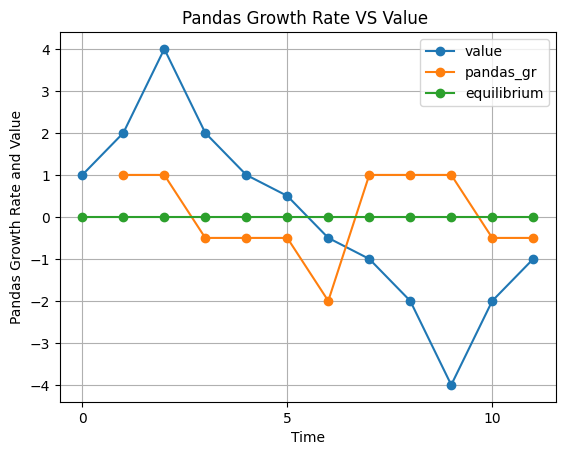

In [10]:
df[[
    'value', 'pandas_gr', 'equilibrium'
]].plot(
    marker='o', grid=True,
    xticks=[0, 5, 10],
    title=(
        'Pandas Growth Rate VS Value '
    ),
    ylabel='Pandas Growth Rate and Value',
    xlabel='Time'
)
df[['value', 'pandas_gr', 'equilibrium']]

In simple terms, as values rise, the growth rate becomes positive, as they fall, they become negative.

## 2] Accelleration (Growth Rate's Growth Rate)

,value,pandas_gr,pandas_gr_gr,equilibrium
0,1.0,NaN,NaN,0
1,2.0,1.0,NaN,0
2,4.0,1.0,0.0,0
3,2.0,-0.5,-1.5,0
4,1.0,-0.5,0.0,0
5,0.5,-0.5,0.0,0
6,-0.5,-2.0,3.0,0
7,-1.0,1.0,-1.5,0
8,-2.0,1.0,0.0,0
9,-4.0,1.0,0.0,0


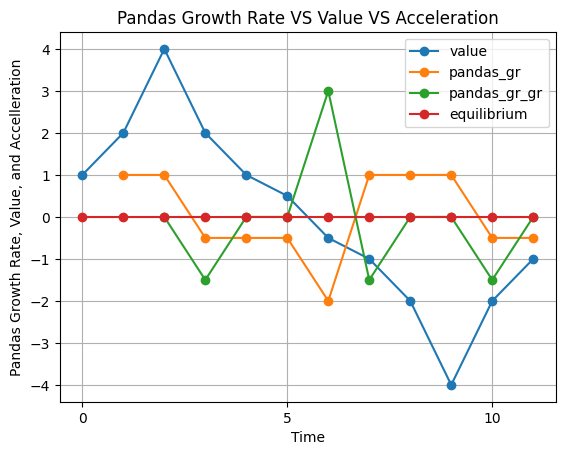

In [11]:
df['pandas_gr_gr'] = df['pandas_gr'].pct_change()
df[[
    'value', 'pandas_gr',
    'pandas_gr_gr', 'equilibrium'
]].plot(
    marker='o', grid=True,
    xticks=[0, 5, 10],
    title=(
        'Pandas Growth Rate VS Value ' +
        'VS Acceleration'
    ),
    ylabel='Pandas Growth Rate, Value, and Accelleration',
    xlabel='Time'
)
df[['value', 'pandas_gr', 'pandas_gr_gr', 'equilibrium']]

Similar to before, if the growth rate rises, so does the accelleration.